# Some examples of (connected?) graphs

There are a few very interesting datasets available online. We will use a collection from Stanford University, see [here](https://snap.stanford.edu/data/). There are relatively large graphs, so will give us the opportunity to explore what happens when the graphs are not just a few vertices.

Let us start with something small: [here](https://snap.stanford.edu/data/ego-Facebook.html). This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

When you read the description, you notice right away that the notion of connectedness is embedded in the graph description: the acronym WCC means *weakly connected components*, SCC being, of course, *strongly connected components*.

Downloading the data, we see that there are a number of files, each prefixed by a number. From the description, these files are as follows (for a given `nodeId`):

- nodeId.edges : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.
- nodeId.circles : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.
- nodeId.feat : The features for each of the nodes that appears in the edge file.
- nodeId.egofeat : The features for the ego user.
- nodeId.featnames : The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

Let us take a look at `nodeId=0`. The most important files (for now) are `0.circles` and `0.edges`. We take a quick look at the text files themselves and remark that `0.circles` seems to be tsv (tab separated values) files, while the entries in `0.edges` are separated by spaces. Also, the data starts from the first row.

In [12]:
circles = read.csv("0.circles", sep = "\t", header = FALSE)
edges = read.csv("0.edges", sep = " ", header = FALSE)

In [13]:
circles
head(edges)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
circle0,71,215,54,61,298,229,81,253,193,⋯,264,29,132,110,163,259,183,334,245,222
circle1,173,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
circle2,155,99,327,140,116,147,144,150,270,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
circle3,51,83,237,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
circle4,125,344,295,257,55,122,223,59,268,⋯,84,156,258,236,250,239,69,NA,NA,NA
circle5,23,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
circle6,337,289,93,17,111,52,137,343,192,⋯,326,310,214,32,115,321,209,312,41,20
circle7,225,46,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
circle8,282,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,V1,V2
,<int>,<int>
1,236,186
2,122,285
3,24,346
4,271,304
5,176,9
6,130,329


`edges` went fine, but for `circles`, we have a problem: despite the fact that all entries in circle15, for instance, seem to be on the same line in the file, they are read as multiple lines. Let us confirm.

In [15]:
dim(circles)

[1] 32 21

Yup, clearly a problem here, there should be way more than 21 columns! Let us try something a bit more evolved: we read line by line and process this. We make a little function (slightly adapted from one [here](https://stackoverflow.com/questions/12626637/read-a-text-file-in-r-line-by-line)).

In [23]:
processFile = function(filepath) {
    con = file(filepath, "r")
    OUT = list()
    i = 1
    while ( TRUE ) {
        line = readLines(con, n = 1)
        if ( length(line) == 0 ) {
            break
        }
        OUT[[i]] = line
        i = i+1
    }
    close(con)
    return(OUT)
}

circles = processFile("0.circles")

In [24]:
circles[[1]]

[1] "circle0\t71\t215\t54\t61\t298\t229\t81\t253\t193\t97\t264\t29\t132\t110\t163\t259\t183\t334\t245\t222"

Looks good. Let us process this to make things a bit easier to use.

In [27]:
for (i in 1:length(circles)) {
    circles[[i]] = gsub("\t", ",", circles[[i]])
}
circles[[1]]

[1] "circle0,71,215,54,61,298,229,81,253,193,97,264,29,132,110,163,259,183,334,245,222"

This one's okay, now let us make the graph, using `graph_from_edgelist` (`from_edgelist` for short); see help [here](https://igraph.org/r/html/latest/graph_from_edgelist.html). Data description says the facebook graph is undirected, so we use that option.

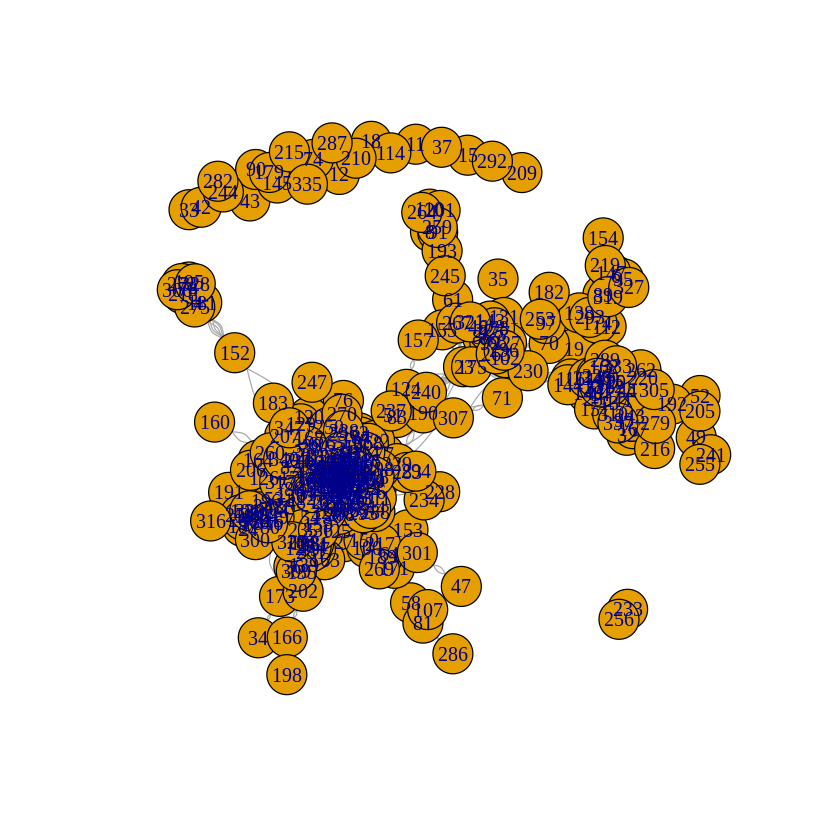

In [63]:
library(igraph)
G = graph_from_edgelist(as.matrix(edges), directed = FALSE)
plot(G)

In [64]:
gorder(G)

[1] 347

In [66]:
C = components(G)
writeLines(paste0("Number of components: ", C$no))
C$csize

Number of components: 19


[1] 324   1   1   1   1   2   1   1   1   3   1   1   1   1   2   2   1   1   1

Let us keep only the vertices in the largest connected component (the one with 324 vertices). We look at the membership information.

In [67]:
groups(C)

$`1`
  [1]   1   2   3   4   5   6   7   8   9  10  13  14  16  17  19  20  21  22
 [19]  23  24  25  26  27  28  29  30  31  32  34  35  36  38  39  40  41  44
 [37]  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
 [55]  63  64  65  66  67  68  69  70  71  72  73  75  76  77  78  79  80  81
 [73]  82  83  84  85  86  87  88  89  91  92  93  94  95  96  97  98  99 100
 [91] 101 102 103 104 105 106 107 108 109 110 111 112 113 115 116 117 118 119
[109] 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
[127] 138 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156
[145] 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
[163] 175 176 177 178 180 181 182 183 184 185 186 187 188 189 190 191 192 193
[181] 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 211 212 213
[199] 214 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
[217] 234 235 236 237 238 239 240 241 242 243 245 246 247 248 249 250 251 252
[235] 253 254 255 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
[253] 272 273 274 275 276 277 278 279 280 281 283 284 285 286 288 289 290 291
[271] 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
[289] 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
[307] 329 330 331 332 333 334 336 337 338 339 340 341 342 343 344 345 346 347

$`2`
[1] 11

$`3`
[1] 12

$`4`
[1] 15

$`5`
[1] 18

$`6`
[1] 33 42

$`7`
[1] 37

$`8`
[1] 43

$`9`
[1] 74

$`10`
[1]  90 145 179

$`11`
[1] 114

$`12`
[1] 209

$`13`
[1] 210

$`14`
[1] 215

$`15`
[1] 233 256

$`16`
[1] 244 282

$`17`
[1] 287

$`18`
[1] 292

$`19`
[1] 335

We need to be able to find what component is the largest. To do that, we simply seek the group with the most elements.

In [70]:
idx_large = which(unlist(lapply(groups(C), length) == max(C$csize)))
idx_large

1 
1

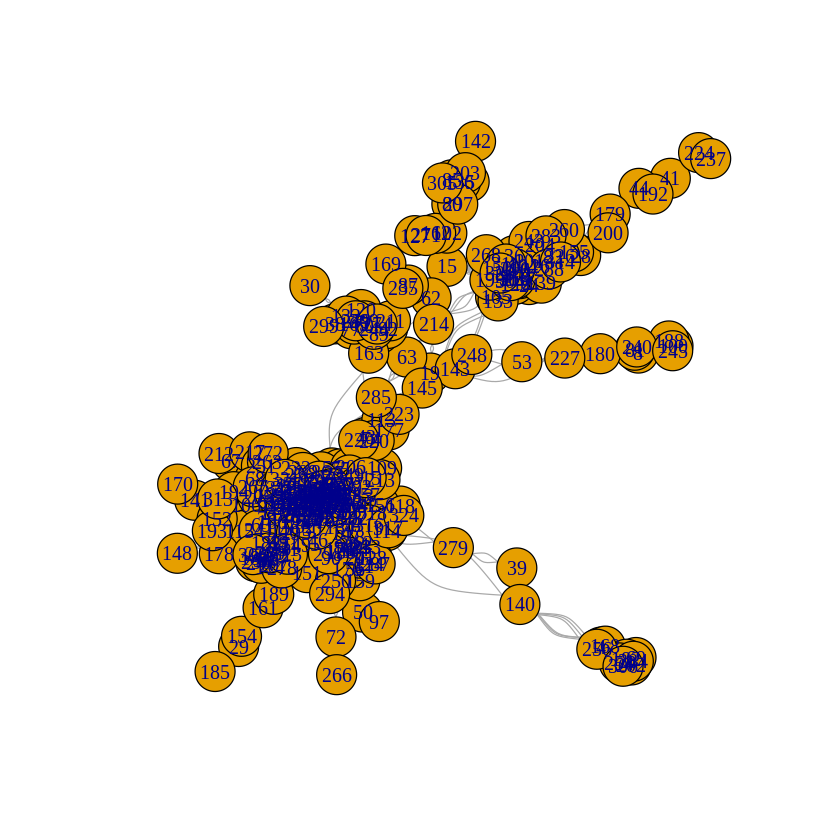

In [71]:
G_c = induced_subgraph(G, groups(C)[[idx_large]])
plot(G_c)